# Gemini API

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).


### Install the Python SDK



In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.5 MB/s eta 0:00:00


Import packages

In [33]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [34]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the 'key image' in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [5]:
import os
os.getenv('')

genai.configure(api_key="")

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models

In [6]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [7]:
model = genai.GenerativeModel('gemini-pro')

In [38]:
%%time
response = model.generate_content("Why is social media addictive?")
##response = model.generate_content("How to insult someone?")

CPU times: user 48.4 ms, sys: 4.47 ms, total: 52.9 ms
Wall time: 7.18 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [39]:
to_markdown(response.text)

> **1. Instant Gratification and Dopamine Release:**
> * Social media platforms provide a constant stream of notifications, likes, and comments, which trigger the release of dopamine, a neurotransmitter associated with pleasure and reward.
> * This immediate feedback loop encourages frequent and repeated use.
> 
> **2. Social Comparison and Validation:**
> * Social media allows users to compare their lives to others, fostering a sense of validation or envy.
> * The desire for positive feedback and approval can drive users to post content that conforms to social norms or seeks attention.
> 
> **3. Fear of Missing Out (FOMO):**
> * The constant updates and ephemeral nature of content create a sense of urgency and anxiety that users may miss out on important information or social interactions.
> * This fear compels them to check their accounts frequently.
> 
> **4. Personalization and Tailored Content:**
> * Social media algorithms learn from user preferences and serve personalized content, which caters to their interests and keeps them engaged.
> * The more relevant and addictive the content, the more likely users are to spend time on the platform.
> 
> **5. Emotional Manipulation:**
> * Social media companies use persuasive design techniques, such as variable rewards and notifications, to manipulate users' emotions and elicit dopamine responses.
> * These tactics can create a cycle of addiction by making users crave the feel-good experiences associated with platform use.
> 
> **6. Social Connectivity and Community:**
> * Social media allows users to connect with friends, family, and like-minded individuals, fulfilling human needs for belonging and social support.
> * The desire for social interaction can drive repeated use, even when users are not actively seeking information.
> 
> **7. Habitual Behavior:**
> * Over time, regular use of social media can form habits that are difficult to break.
> * The ease of access and the automatic nature of checking notifications reinforce these behaviors.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [40]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [21]:
response.candidates

[content {
  parts {
    text: "**Dopamine Release:**\n\n* Social media engages in activities that trigger the release of dopamine, a neurotransmitter associated with pleasure and reward.\n* Likes, comments, shares, and notifications act as cues that release bursts of dopamine, reinforcing the behavior of using social platforms.\n\n**Variable Rewards:**\n\n* Social media presents unpredictable rewards, such as the timing of notifications or the number of likes on a post. This variability makes the experience more engaging and keeps users coming back for more.\n\n**Psychological Validation:**\n\n* Social media provides opportunities for social validation and self-esteem boost.\n* Positive attention, likes, and comments can create a sense of belonging and acceptance, making users crave the validation.\n\n**FOMO (Fear of Missing Out):**\n\n* Social media creates a constant fear of missing out on important events or updates from friends and followers.\n* This anxiety drives users to check 

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [16]:
%%time
response = model.generate_content("Why is social media addictive?", stream=True)

CPU times: user 58.7 ms, sys: 8.8 ms, total: 67.5 ms
Wall time: 8.42 s


In [41]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

**1. Instant Gratification and Dopamine Release:**
* Social media platforms provide a constant stream of notifications, likes, and comments, which trigger the release of dopamine, a neurotransmitter associated with pleasure and reward.
* This immediate feedback loop encourages frequent and repeated use.

**2. Social Comparison and Validation:**
* Social media allows users to compare their lives to others, fostering a sense of validation or envy.
* The desire for positive feedback and approval can drive users to post content that conforms to social norms or seeks attention.

**3. Fear of Missing Out (FOMO):**
* The constant updates and ephemeral nature of content create a sense of urgency and anxiety that users may miss out on important information or social interactions.
* This fear compels them to check their accounts frequently.

**4. Personalization and Tailored Content:**
* Social media algorithms learn from user preferences and serve personalized content, which caters to their int

## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [ ]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  6982k      0 --:--:-- --:--:-- --:--:-- 7106k


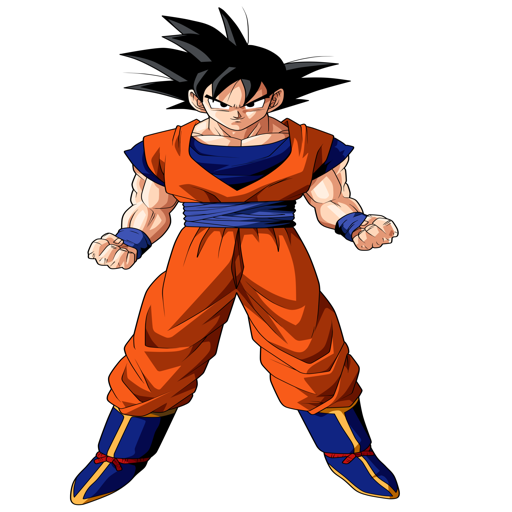

In [24]:
import PIL.Image

img = PIL.Image.open('/content/dc418c8d277365d59b6dc0875c611b59.png')
#below lline only if your image is too large
img = img.resize((512, 512))
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [25]:
model = genai.GenerativeModel('gemini-pro-vision')

In [26]:
response = model.generate_content(img)

to_markdown(response.text)

>  This is Goku, the main protagonist of the Dragon Ball series.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [27]:
response = model.generate_content(["Write a short, engaging post based on this picture. ", img], stream=True)
response.resolve()

In [28]:
to_markdown(response.text)

>  Goku is the main protagonist of the Dragon Ball metaseries. Created by Akira Toriyama, he first appeared in the Weekly Shōnen Jump manga series in 1984. Goku is a Saiyan, a race of extraterrestrial warriors, and the son of Bardock and Gine. Goku was originally sent to Earth as a baby to conquer it, but a head injury shortly after his arrival caused him to lose his memory of his mission and grow up with a kind heart. Goku is known for his strength, courage, and determination, as well as his loyalty to his friends. He is also a skilled martial artist and has mastered a variety of powerful techniques, including the Kamehameha wave.